In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
from datetime import datetime, timedelta
import pymc3 as pm
from os import walk
from scipy.stats import lognorm
from scipy import stats as sps

/Users/daniel/.pyenv/versions/3.6.5/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
n = 50
data = pd.Series([-.76, -.76, 1.36] * n)
f'std: {data.std():.3f}'

'std: 1.003'

In [72]:
with pm.Model() as model:
    obs_mu = pm.Normal('obs_mu', mu=0, sigma=10, shape=2)
    obs_sigma = pm.Gamma('obs_sigma', 5, 1, shape=2)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    
    obs = pm.NormalMixture('obs', 
                           w=w,
                           mu=obs_mu, 
                           sigma=obs_sigma,
                           observed=data)

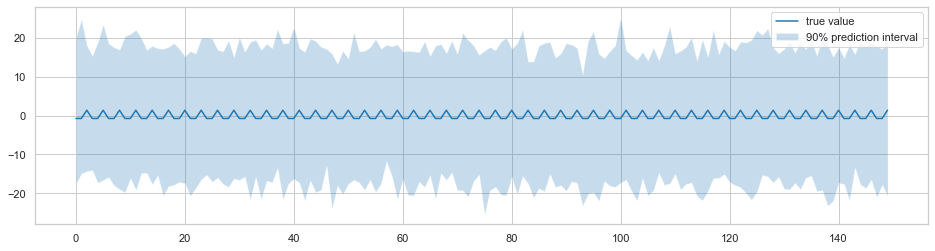

In [73]:
def sanity_check(true_value):
    """
    :param m: (pm.Model)
    :param df: (pd.DataFrame)
    """
    # Sample from the prior and check of the model is well defined.
    y = pm.sample_prior_predictive(samples=100, model=model, vars=['obs'])['obs']
    plt.figure(figsize=(16, 4))
    plt.fill_between(np.arange(y.shape[1]),
                     pd.DataFrame(y).quantile(0.05),
                     pd.DataFrame(y).quantile(0.95),
                     alpha=0.25, 
                     label='90% prediction interval')
    plt.plot(true_value.values, label='true value')
    plt.legend()
    

# And run the sanity check
sanity_check(data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /Users/daniel/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, obs_sigma, obs_mu]
Sampling 4 chains, 1,481 divergences: 100%|██████████| 4000/4000 [00:59<00:00, 67.18draws/s] 
INFO (theano.gof.compilelock): Refreshing lock /Users/daniel/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir/lock
There were 398 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.056646666981958665, but should be close to 0.8. Try to increase the number of tuning steps.
There were 343 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.03826991362392054, but should be close to 0.8. Try to increase the number of tuning steps.
T

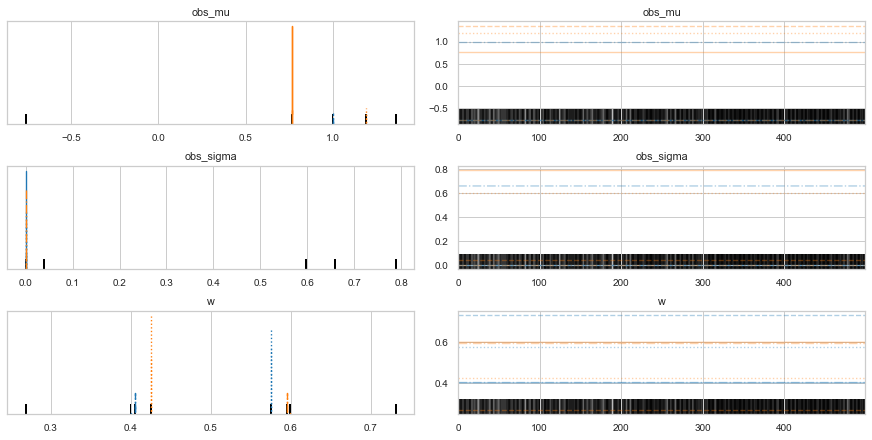

In [74]:
with model:
    trace = pm.sample()
    pm.traceplot(trace)

(array([[1500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,
            0.],
        [ 500.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,
         1000.]]),
 array([-0.76      , -0.54797371, -0.33594742, -0.12392113,  0.08810516,
         0.30013145,  0.51215774,  0.72418403,  0.93621032,  1.14823661,
         1.3602629 ]),
 <a list of 2 Lists of Patches objects>)

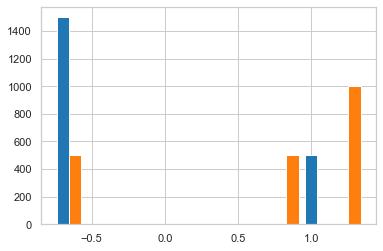

In [75]:
plt.hist(trace['obs_mu'])

/Users/daniel/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:01<00:00, 114.44it/s]


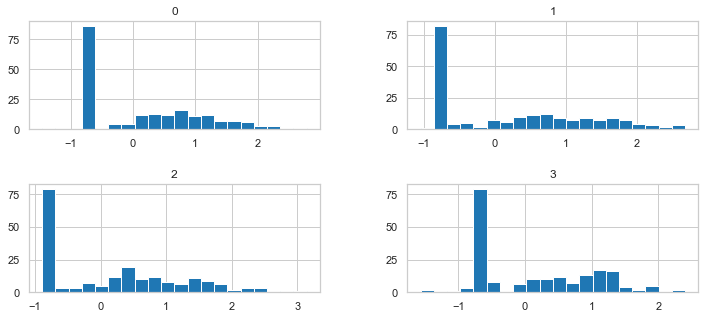

In [76]:
posterior = pm.sample_posterior_predictive(trace, model=model, samples=200)
post_obs = pd.DataFrame(posterior['obs'])
post_obs[range(4)].hist(bins=20, figsize=(12,5))
plt.subplots_adjust(hspace=.5)

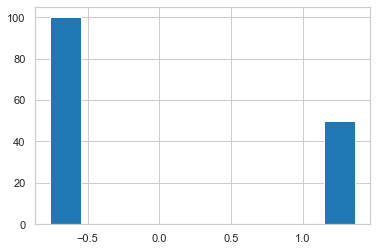

In [77]:
data.hist()

## Distribution Playground

In [46]:
with pm.Model():
    vals = pm.Gamma('gamma', 5, 1).random(size=100000)

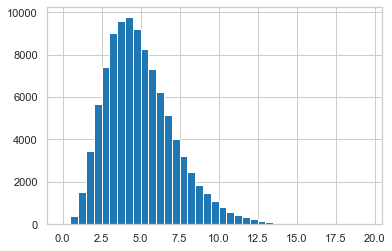

In [47]:
pd.Series(vals).hist(bins=np.arange(0, 20, 0.5))